#  Predicción del costo de casa-habitación Regresión Lineal

In [1]:
import os
import path
import zipfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

**Nota** StandardScaler es para las columnas y Normalizer para las filas

In [2]:
Path = "/home/michell21/Datasets/" #Puede cambiar de acuerdo al usuario

## Preparar los datos
El archivo original ha sido renombrado como "California-housing.zip"

In [ ]:
#Solo ejecutar la primera vez, ya que después de eso, ya está creada la carpeta con los archivos necesarios
with zipfile.ZipFile(Path+'California-housing.zip', 'r') as archive:
   # Extract all the contents of zip file in current directory
   archive.extractall(Path)

In [ ]:
os.listdir(Path)

In [3]:
house = pd.DataFrame(pd.read_csv(Path+"California_Houses.csv"))

In [4]:
house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Hacemos exploración de los datos 
Esto se realiza con el fin de darnos una idea de cómo son los datos y que contienen

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [6]:
house.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


Como se puede apreciar, no hay datos faltantes. Por lo tanto no es necesario rellenar datos como en la práctica anterior. Pero los datos se encuentran en diferentes escalas, por lo tanto es necesario escalar los datos

## Visualización de Datos

In [7]:
def grafica(data, colx, coly):
    plt.plot(data[colx], data[coly], 'o')
    plt.xlabel(colx, size = 15)
    plt.ylabel(coly, size = 15)
    plt.title(colx+' vs '+ coly, size = 20)
    plt.show()

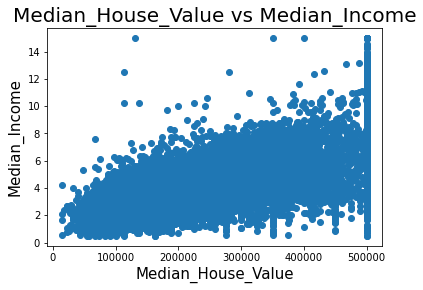

In [8]:
grafica(house, 'Median_House_Value', 'Median_Income')

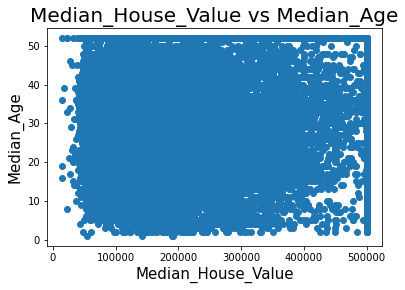

In [9]:
grafica(house, 'Median_House_Value', 'Median_Age')

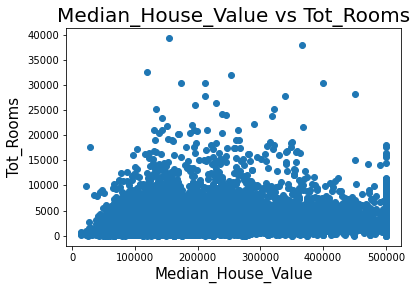

In [10]:
grafica(house, 'Median_House_Value', 'Tot_Rooms')

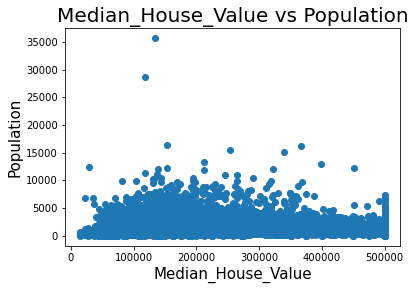

In [11]:
grafica(house, 'Median_House_Value', 'Population')

La mayoría de los datos se concentran en la primera mitad de las variables independientes


## Dividimos las columnas en $X$ y $y$

In [5]:
y = house['Median_House_Value']
X = house.iloc[:,1:]

In [6]:
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [14]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: Median_House_Value, dtype: float64

## Escalamos los datos por columna usando StandardScaler

StandardScalerr se calcula eliminando la media y escalando a la varianza de la unidad La puntuación estándar de una muestra $x$ se calcula como: $z = \frac{(x - u)}{s}$ donde $u$ es la media de las muestras de entrenamiento o cero si with_mean = False, y $s$ es la desviación estándar de las muestras de entrenamiento o uno si with_std = False.

In [7]:
sc = StandardScaler()
Xsc = X.copy()
Xsc.iloc[:,:] = sc.fit_transform(X.iloc[:, :])

In [16]:
Xsc.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835,-0.635876,1.158969,1.165668,-1.297546,-1.461074
1,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844,-0.616285,1.149889,1.157842,-1.308518,-1.462552
2,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827,-0.656307,1.151224,1.158840,-1.309359,-1.470824
3,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
4,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945


## Escalamos los datos por columna usando MinMaxScaler

In [8]:
scaler = MinMaxScaler() 
Xnorm = X.copy()
scaled_values = scaler.fit_transform(X)

In [18]:
Xnorm.loc[:,:] = scaled_values
Xnorm.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,0.539668,0.784314,0.022331,0.019863,0.008941,0.020556,0.567481,0.211155,0.027398,0.546362,0.614340,0.079961,0.023023
1,0.538027,0.392157,0.180503,0.171477,0.067210,0.186976,0.565356,0.212151,0.030283,0.544152,0.612446,0.077112,0.022614
2,0.466028,1.000000,0.037260,0.029330,0.013818,0.028943,0.564293,0.210159,0.024390,0.544477,0.612688,0.076894,0.020323
3,0.354699,1.000000,0.032352,0.036313,0.015555,0.035849,0.564293,0.209163,0.022918,0.545050,0.613164,0.077396,0.019459
4,0.230776,1.000000,0.041330,0.043296,0.015752,0.042427,0.564293,0.209163,0.022918,0.545050,0.613164,0.077396,0.019459


In [9]:
def regression(X, y):
    #Dividimos los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)
    
    #Construir el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #Predicciones
    y_pred = model.predict(X_test)
    
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False))
    print("MAE =", mean_absolute_error(y_test, y_pred))
    plt.plot(y_test.index, y_test, 'o')
    plt.plot(y_test.index, y_pred, 'o')
    return y_test, y_pred

## Hacer regresión con los datos StandardScaler

RMSE = 68834.79870210506
MAE = 50295.87234304882


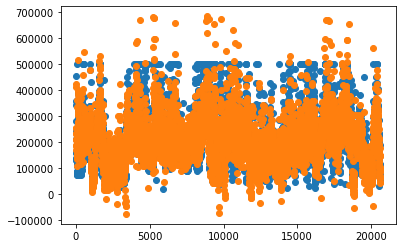

In [10]:
y_test_sc, y_sc = regression(Xsc, y)

## Hacer regresión con los datos MinMaxScaler

RMSE = 68817.56323469666
MAE = 50116.94099833763


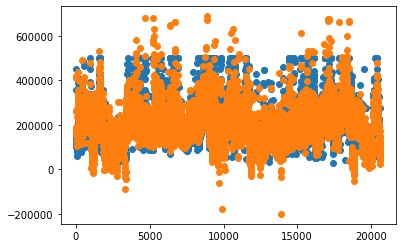

In [11]:
y_test_norm, y_norm = regression(Xnorm, y)

Al usar MinMaxScaler se tienen mejores resultados que al usar StandardScaler. 

Poner gráfica de barras que compare los errores usando ambos datasets (diferencias entre true y pred)

Calculo de valores presente (poner ejercicios adicionales)

Buscar los valores actuales para comparar los precios reales con las predicciones

## Comparando ambas predicciones

/home/michell21/anaconda3/envs/practicasML/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


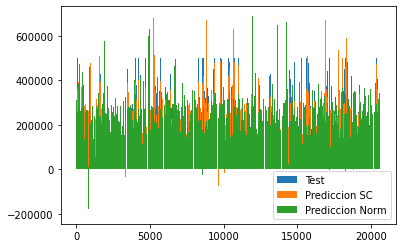

In [15]:
x_axis = y_test_sc.index
#y_axis = y_test_sc
plt.bar(x_axis, y_test_sc, width = 10, label = 'Test')
plt.bar(x_axis, y_sc, width = 10, label = 'Prediccion SC')
plt.bar(x_axis, y_norm, width = 10, label = 'Prediccion Norm')
plt.legend()
plt.show()

### Ejercicios adicionales

- Investigar los precios actuales de casas en california y sus caracteristicas. 
- Usar el modelo de regresión lineal para predecir los precios actuales
- Comprobar resultados